In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from scipy.spatial.distance import cosine

In [11]:
# CHANGE THIS TO YOUR DATASET PATH
IMAGE_DIR = r"E:\projects\Machine Learning Project\Supervised Learning Projects\women fashion"

image_paths = [
    img for img in glob.glob(os.path.join(IMAGE_DIR, "*"))
    if img.lower().endswith((".jpg", ".png", ".jpeg", ".webp"))
]

print("Total images found:", len(image_paths))


Total images found: 96


In [12]:
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

model = Model(inputs=base_model.input, outputs=base_model.output)


In [13]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)


def extract_features(model, img_path):
    processed = preprocess_image(img_path)
    features = model.predict(processed, verbose=0)
    features = features.flatten()
    features = features / np.linalg.norm(features)
    return features


In [14]:
all_features = []

for img_path in image_paths:
    features = extract_features(model, img_path)
    all_features.append(features)

all_features = np.array(all_features)

print("Feature extraction completed!")


Feature extraction completed!


In [15]:
def recommend_fashion_items(
    input_image_path,
    image_paths,
    features,
    top_n=4
):
    input_features = extract_features(model, input_image_path)

    similarities = [
        1 - cosine(input_features, feat)
        for feat in features
    ]

    sorted_indices = np.argsort(similarities)[::-1]

    input_index = image_paths.index(input_image_path)
    sorted_indices = [i for i in sorted_indices if i != input_index]

    top_indices = sorted_indices[:top_n]

    plt.figure(figsize=(15, 6))

    # Input image
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis("off")

    # Recommendations
    for i, idx in enumerate(top_indices):
        plt.subplot(1, top_n + 1, i + 2)
        plt.imshow(Image.open(image_paths[idx]))
        plt.title(f"Recommendation {i+1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

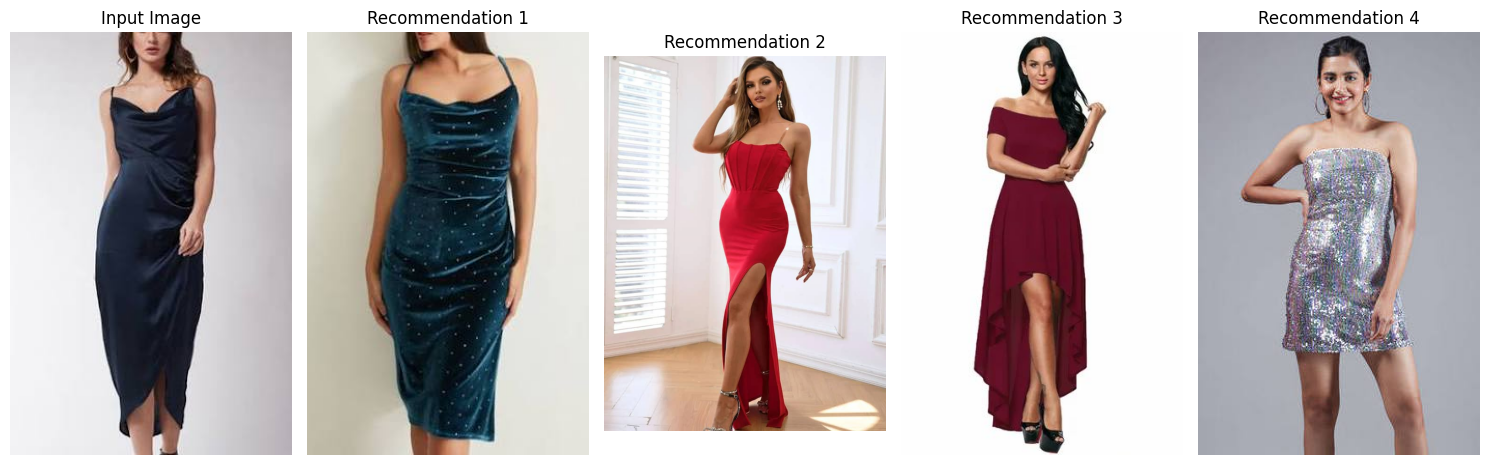

In [16]:
input_image = r"E:\projects\Machine Learning Project\Supervised Learning Projects\women fashion\dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg"

recommend_fashion_items(
    input_image_path=input_image,
    image_paths=image_paths,
    features=all_features,
    top_n=4
)
